In [1]:
import pandas as pd
import networkx as nx
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
datos_nombre_ciudad = pd.read_csv('C:\\Users\\wendy\\alg\\datos_valores_ciudad.csv')
datos_nombre_ciudad.set_index(['nombre'], inplace = True)
datos_nombre_ciudad.head()

,ciudad
nombre,
A,Mexico
B,Guadalajara
C,Tijuana
D,Nuevo Leon
E,Oaxaca


In [3]:
datos_valores_ciudad = pd.read_csv('C:\\Users\\wendy\\alg\\valores_ciudad.csv')
#datos_valores_ciudad.set_index(['origen'], inplace = True)
datos_valores_ciudad.head()

,origen,destino,precio,duracion_min
0,A,B,942,73
1,A,C,1719,217
2,A,D,2464,104
3,A,G,1076,125
4,A,H,929,60


In [5]:
DG = nx.DiGraph()
for filas in datos_valores_ciudad.iterrows():
    DG.add_edge(filas[1]['origen'], filas[1]['destino'], peso = filas[1]['precio'], tiempo_min = filas[1]['duracion_min'])
DG.nodes(data = True)

NodeDataView({'A': {}, 'B': {}, 'C': {}, 'D': {}, 'G': {}, 'H': {}, 'I': {}, 'E': {}, 'F': {}, 'J': {}})

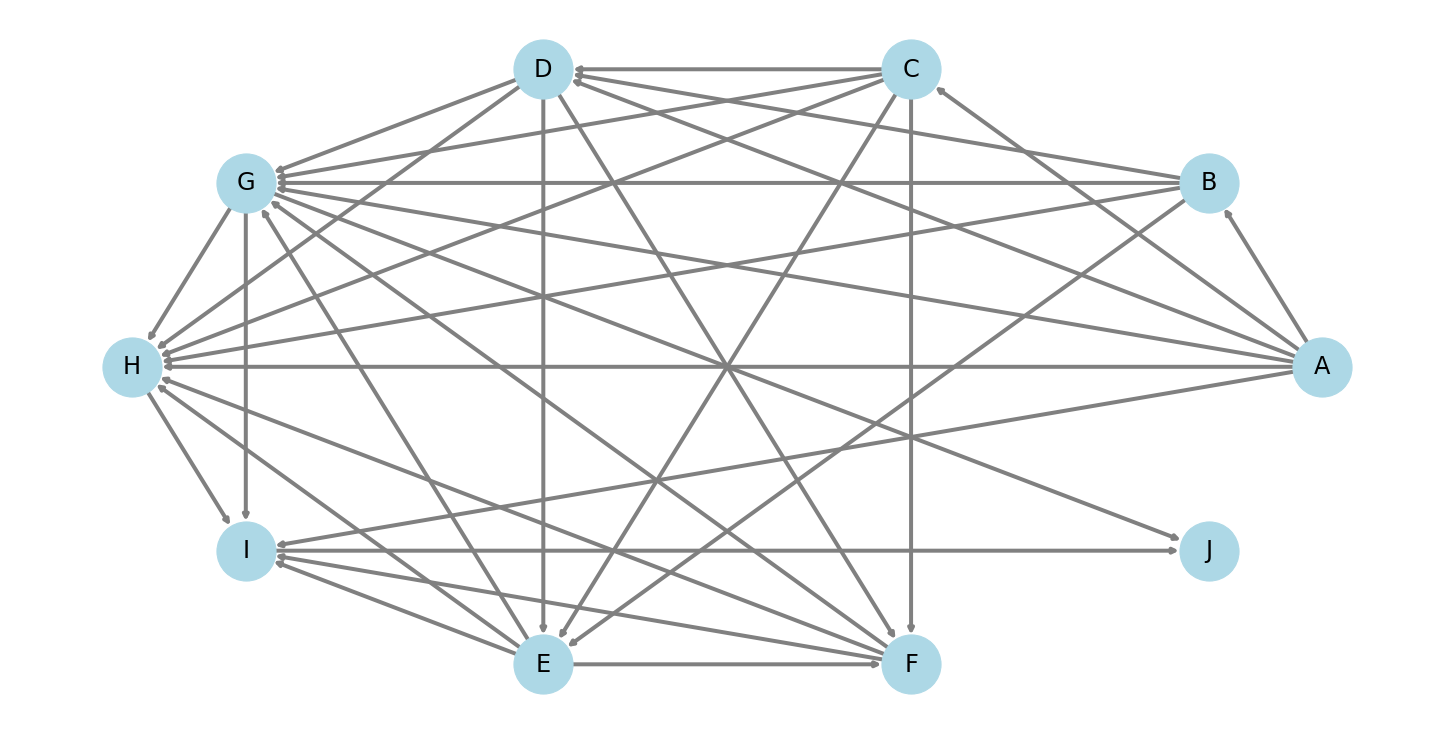

In [6]:
nx.draw_circular(DG, node_color = 'lightblue', edge_color = 'gray', font_size = 24, width = 4, with_labels = True, node_size = 3500)

In [7]:
list(nx.all_shortest_paths(DG, source = 'A', target = 'E', weight = None))

[['A', 'B', 'E'], ['A', 'C', 'E'], ['A', 'D', 'E']]

In [11]:
camino = list(nx.dijkstra_path(DG, source = 'A', target = 'I', weight = 'precio'))
print(camino)

['A', 'I']


In [13]:
def ruta(path):
    total_precio = 0
    total_tiempo = 0
    for i in range (len(path) - 1):
        origen = path[i]
        destino = path[i + 1]
        precio = DG[origen][destino]["peso"]
        tiempo = DG[origen][destino]["tiempo_min"]
        total_precio = total_precio + precio
        total_tiempo = total_tiempo + tiempo
        print("%s -> %s, Precio : %s, Tiempo: %s" %(datos_nombre_ciudad.loc[origen]['ciudad'], datos_nombre_ciudad.loc[destino]['ciudad'], precio, tiempo))
    print("\nTotal de precio: %s" %(total_precio))
    print("\nTotal de tiempo en minutos: %s" %(total_tiempo))

In [14]:
camino = list(nx.dijkstra_path(DG, source = 'A', target = 'J', weight = 'precio'))
ruta(camino)

Mexico -> Cancun, Precio : 1076, Tiempo: 125
Cancun -> Nuevo Laredo, Precio : 2771, Tiempo: 338

Total de precio: 3847

Total de tiempo en minutos: 463


In [30]:
camino = list(nx.dijkstra_path(DG, source = 'A', target = 'F', weight = 'precio'))
ruta(camino)

Mexico -> Tijuana, Precio : 1719, Tiempo: 217
Tijuana -> Veracruz, Precio : 1787, Tiempo: 206

Total de precio: 3506

Total de tiempo en minutos: 423


In [32]:
camino = list(nx.dijkstra_path(DG, source = 'C', target = 'I', weight = 'precio'))
ruta(camino)

Tijuana -> Oaxaca, Precio : 6884, Tiempo: 215
Oaxaca -> San Jose del Cabo, Precio : 2222, Tiempo: 347

Total de precio: 9106

Total de tiempo en minutos: 562


In [36]:
camino = list(nx.dijkstra_path(DG, source = 'B', target = 'F', weight = 'precio'))
ruta(camino)

Guadalajara -> Nuevo Leon, Precio : 1091, Tiempo: 90
Nuevo Leon -> Veracruz, Precio : 1684, Tiempo: 100

Total de precio: 2775

Total de tiempo en minutos: 190


In [37]:
camino = list(nx.dijkstra_path(DG, source = 'D', target = 'I', weight = 'precio'))
ruta(camino)

Nuevo Leon -> Oaxaca, Precio : 1684, Tiempo: 115
Oaxaca -> San Jose del Cabo, Precio : 2222, Tiempo: 347

Total de precio: 3906

Total de tiempo en minutos: 462
